In [20]:
# dataset
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt

data = genfromtxt('advertising.csv', delimiter=',', skip_header=1)

m = data.shape[0]
X = data[:,:3]
y = data[:,3:]

maxi = np.max(X)
mini = np.min(X)
avg = np.mean(X)
X = (X-avg) / (maxi-mini)

X_b = np.c_[np.ones((m, 1)), X]

(200, 4)
[230.1  37.8  69.2  22.1]
(200, 4)
(200, 1)
[ 1.          0.55042679 -0.09835864  0.00757928]
[22.1]


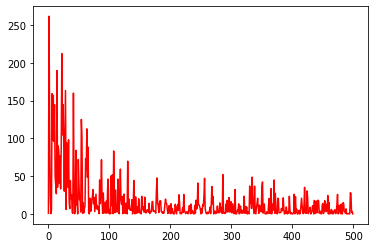

[0.9311947268760898, 261.6506245043877, 114.58742686181412, 25.716207136634836, 0.4307271130670035, 4.739744519766585, 159.152405023165, 97.81336822413166, 157.0218978036181, 96.01034112721298, 144.66372438561183, 49.270040570365865, 36.95324502179711, 26.6793105209316, 189.7270943227351, 35.21092533222943, 90.00290903456397, 82.43885521009005, 40.766599763173026, 76.564363883701, 33.07560725602046, 87.60920711970869, 212.2433440443547, 104.61455534110314, 144.86266287093417, 98.90731754596158, 30.106350816048458, 93.06631298857468, 163.4076865053494, 5.836545904688779, 94.41695603317541, 65.40994625140526, 34.881059903782244, 98.0788806528646, 15.912657187874045, 6.840493622983089, 44.19131019134748, 20.187676839949923, 25.52372081266542, 2.201269674216461, 0.8263198519183741, 159.91933255260727, 44.01544592197674, 0.1307472319839415, 7.173061718191699, 84.14121014749657, 12.117341886131019, 18.40826715646275, 0.06778748617797914, 72.02449665781532, 41.49951689771209, 18.7797329399493

In [21]:
def stochastic_gradient_descent():
    n_epochs = 50
    learning_rate = 0.01
    
    # khởi tạo giá trị tham số
    thetas = np.random.randn(4, 1)
    
    thetas_path = [thetas]
    losses = []
    
    for epoch in range(n_epochs):
        for i in range(m):
            # lấy ngẫu nhiên 1 sample
            random_index = np.random.randint(m)
            xi = X_b[random_index:random_index+1]
            yi = y[random_index:random_index+1]
            
            # tính output 
            oi = xi.dot(thetas)
            
            # tính loss li
            li = (oi - yi)*(oi - yi) / 2
            
            # tính gradient cho loss
            g_li = (oi - yi)
            
            # tính gradient 
            gradients = xi.T.dot(g_li)
                        
            # update giá trị theta
            thetas = thetas - learning_rate*gradients
            
            # logging
            thetas_path.append(thetas)            
            losses.append(li[0][0])

    return thetas_path, losses

bgd_thetas, losses = stochastic_gradient_descent()

# in loss cho 500 sample đầu
x_axis = list(range(500))
plt.plot(x_axis,losses[:500], color="r")
plt.show()

#print(losses[:100])

#plt.scatter(X, y)
#data_y = X*bgd_thetas[-1][1]+ bgd_thetas[-1][0]
#plt.plot(X,data_y, color="r")
#plt.show()

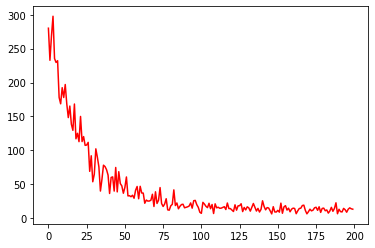

In [24]:
def mini_batch_gradient_descent():
    n_iterations = 50
    minibatch_size = 20
    
    thetas = np.random.randn(4, 1)
    thetas_path = [thetas]    
    losses = []
    
    for epoch in range(n_iterations):
        shuffled_indices = np.random.permutation(m)
        X_b_shuffled = X_b[shuffled_indices]
        y_shuffled = y[shuffled_indices]
                
        for i in range(0, m, minibatch_size):
            xi = X_b_shuffled[i:i+minibatch_size]
            yi = y_shuffled[i:i+minibatch_size]
            
            # tính output 
            output = xi.dot(thetas)
            
            # tính loss
            loss = (output - yi)**2
            
            # tính đạo hàm cho loss
            loss_grd = 2*(output - yi)/minibatch_size
            
            # tính đạo hàm cho các tham số
            gradients = xi.T.dot(loss_grd)
            
            # cập nhật tham số
            learning_rate = 0.01
            thetas = thetas - learning_rate*gradients
            thetas_path.append(thetas)
            
            loss_mean = np.sum(loss)/minibatch_size
            losses.append(loss_mean)

    return thetas_path, losses

mbgd_thetas, losses = mini_batch_gradient_descent()

# in loss cho 100 sample đầu
x_axis = list(range(200))
plt.plot(x_axis,losses[:200], color="r")
plt.show()

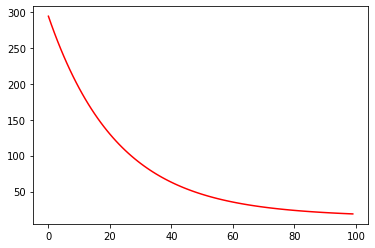

In [26]:
def batch_gradient_descent():
    n_iterations = 100
    learning_rate = 0.01
    
    # khởi tạo giá trị tham số
    thetas = np.random.randn(4, 1)
    thetas_path = [thetas]
    losses = []
    
    for i in range(n_iterations):
        # tính output
        output = X_b.dot(thetas)
        
        # tính loss
        loss = (output - y)**2        
                
        # tính đạo hàm cho loss
        loss_grd = 2*(output - y)/m
        
        # tính đạo hàm cho các tham số
        gradients = X_b.T.dot(loss_grd)
        
        # cập nhật tham số
        thetas = thetas - learning_rate*gradients
        thetas_path.append(thetas)
        
        mean_loss = np.sum(loss)/m
        losses.append(mean_loss)

    return thetas_path, losses

bgd_thetas, losses = batch_gradient_descent()

# in loss cho 100 sample đầu
x_axis = list(range(100))
plt.plot(x_axis,losses[:100], color="r")
plt.show()